<a href="https://colab.research.google.com/github/Belvglin/Nanoparticle-Toxicity-Dataset/blob/main/Gainanov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.interpolate import griddata
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
data = pd.read_csv("nanotox_dataset.csv")

In [ ]:
data.fillna(0, inplace=True)

<Axes: xlabel='coresize'>

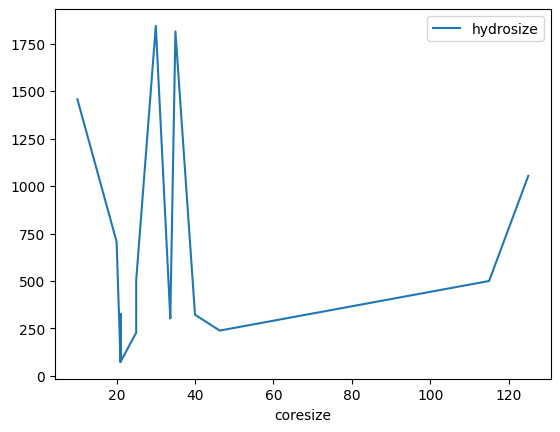

In [ ]:
data.sort_values(data.columns[1],inplace=True)
filtr_data = data[data['NPs'] == 'TiO2']
filtr_data.plot(x='coresize', y='hydrosize')

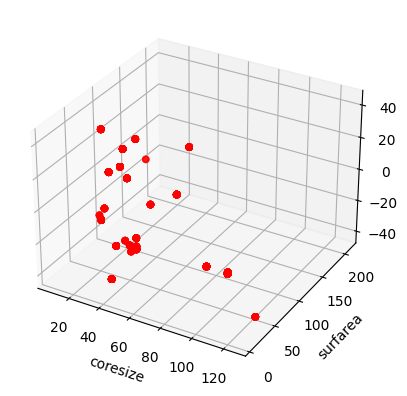

In [ ]:
xscat = data['coresize'].values
yscat = data['surfarea'].values
zscat = data['surfcharge'].values

# Создание 3D графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Построение графика
ax.scatter(xscat, yscat, zscat, c='r', marker='o')

# Добавление подписей
ax.set_xlabel('coresize')
ax.set_ylabel('surfarea')
ax.set_zlabel('surfcharge')

# Отображение графика
plt.show()

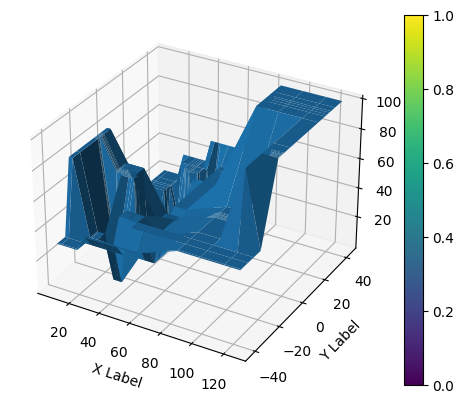

In [ ]:
x = data['coresize'].values
y = data['surfcharge'].values
z = data['dosage'].values

# Создание сетки
X = np.unique(xsurf)
Y = np.unique(ysurf)
X, Y = np.meshgrid(X, Y)

# Интерполяция Z значений
Z = griddata((xsurf, ysurf), z, (X, Y), method='nearest')  # Используйте 'cubic' или 'nearest' для других методов

# Создание 3D графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Построение поверхности
surf = ax.plot_surface(X, Y, Z)

# Добавление цветовой шкалы
fig.colorbar(surf)

# Добавление подписей
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Отображение графика
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


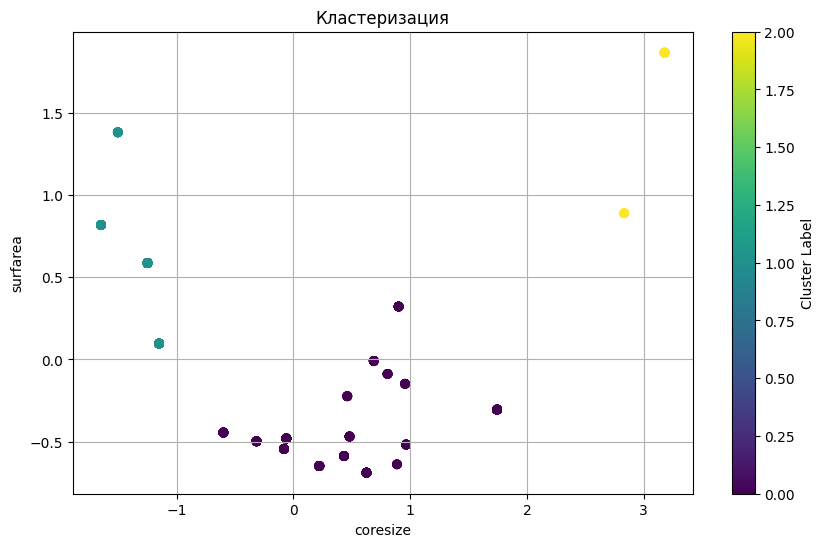

In [ ]:
# Шаг 1: Загрузка данных
df = pd.DataFrame(data, columns=['coresize', 'surfarea'])
# Шаг 2: Предобработка данных
# Удаляем строки с пропущенными значениями и выбираем только числовые колонки
data_cleaned = df.dropna()
X = data_cleaned.select_dtypes(include=[np.number])

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Шаг 3: Кластеризация K-means
kmeans = KMeans(n_clusters=3, random_state=10)  # Выберите количество кластеров
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Шаг 4: Визуализация результатов
# Снижение размерности до 2D для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('Кластеризация')
plt.xlabel('coresize')
plt.ylabel('surfarea')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

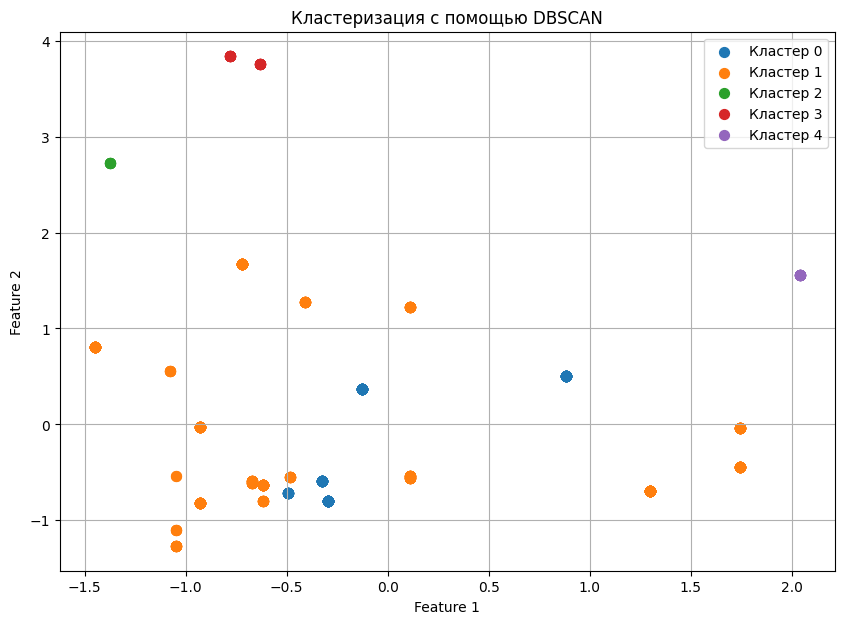

In [ ]:
X = data.iloc[:, 1:4].values  # Измените индексы в зависимости от вашего датасета

# Стандартизация данных
X = StandardScaler().fit_transform(X)

# Применение алгоритма DBSCAN
dbscan = DBSCAN(eps=1.3, min_samples=3)  # Настройте параметры eps и min_samples по необходимости
clusters = dbscan.fit_predict(X)

# Визуализация результатов
plt.figure(figsize=(10, 7))
unique_labels = set(clusters)

for label in unique_labels:
    if label == -1:
        # Отметим шум
        plt.scatter(X[clusters == label, 0], X[clusters == label, 1],
                    s=50, marker='x', color='k', label='Шум')
    else:
        plt.scatter(X[clusters == label, 0], X[clusters == label, 1],
                    s=50, label=f'Кластер {label}')

plt.title('Кластеризация с помощью DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

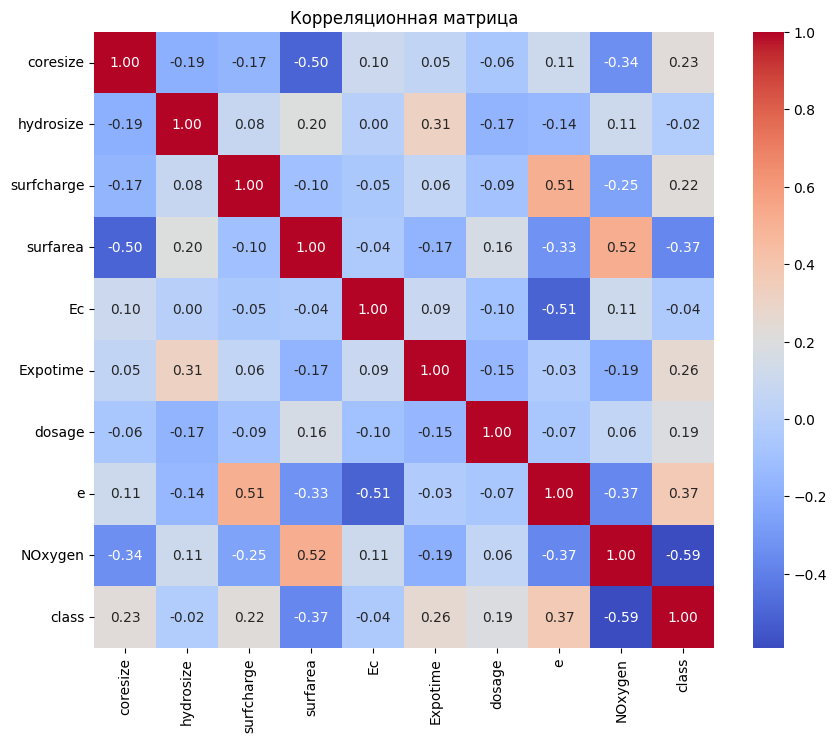

In [ ]:
# Шаг 2: Извлечение только числовых данных
numeric_data = data.select_dtypes(include=['number'])

# Шаг 3: Построение корреляционной матрицы
correlation_matrix = numeric_data.corr()

# Шаг 4: Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))  # Задаем размер графика
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.index)
plt.title('Корреляционная матрица')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
